In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/MyDrive/Paper Xu ly anh y khoa/"

/content/drive/.shortcut-targets-by-id/1JjI70uF74h5PSP61vsmUPrcSIUZA4ceg/Paper Xu ly anh y khoa


### **Phase 1:** `normal` **and** `positive` **classification**
Mục đích của việc phân loại `normal` và `positive`:
* Kiểm tra độ phủ (recall) và độ chính xác (precision).

> **Recall**: trong những người thực sự có bệnh, bao nhiêu trong số họ được dự đoán đúng bởi mô hình ? \
**Precision**: là tỷ lệ giữa những người thật sự có bệnh so với tất cả những người được dự đoán là có bệnh.

* Bài toán binary classification







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os

from keras.layers import Dense, Flatten
from keras.models import Model
# from keras.applications.inception_v3 import InceptionV3
from keras.applications import MobileNetV3Large

from tensorflow.keras.optimizers import Adam

Read images using `ImageDataGenerator`

In [ ]:
# Defining the parameters
IMG_CHANEL = 3
COLOR_MODE = 'rgb'
CLASS_NAME = ['normal', 'positive']
IMAGESHAPE = [224, 224, 3]

In [ ]:
# Function to feed data set into the model
from keras.preprocessing.image import ImageDataGenerator

## For training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:
# Setting folder path
train_data = 'data/train/'
val_data = 'data/val/'
test_data = 'data/test/'

In [ ]:
train_set = train_datagen.flow_from_directory(train_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 17369 images belonging to 2 classes.


In [ ]:
val_set = testing_datagen.flow_from_directory(val_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 1931 images belonging to 2 classes.


Build model

In [ ]:
mobilenet_v3_large_model = MobileNetV3Large(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
for each_layer in mobilenet_v3_large_model.layers:
		each_layer.trainable = False

In [ ]:
# Flatten output
flatten_layer = Flatten()(mobilenet_v3_large_model.output)
prediction = Dense(len(CLASS_NAME), activation='softmax')(flatten_layer)

In [ ]:
final_model = Model(inputs=mobilenet_v3_large_model.input, outputs=prediction)
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Compile model
final_model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
)

In [ ]:
# Train model
fitted_model = final_model.fit_generator(generator = train_set,
                                         validation_data = val_set,
                                         epochs=10,
                                         steps_per_epoch=len(train_set),
                                         validation_steps=len(val_set)
                                        )

<ipython-input-17-6c19f3e4afa6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model = final_model.fit_generator(generator = train_set,


Epoch 1/10
272/272 [==============================] - 7955s 29s/step - loss: 0.6902 - accuracy: 0.6238 - val_loss: 0.6005 - val_accuracy: 0.6846
Epoch 2/10
272/272 [==============================] - 519s 2s/step - loss: 0.6030 - accuracy: 0.6704 - val_loss: 0.6376 - val_accuracy: 0.6282
Epoch 3/10
272/272 [==============================] - 513s 2s/step - loss: 0.6093 - accuracy: 0.6763 - val_loss: 0.6205 - val_accuracy: 0.6805
Epoch 4/10
272/272 [==============================] - 507s 2s/step - loss: 0.5740 - accuracy: 0.6954 - val_loss: 0.5314 - val_accuracy: 0.7131
Epoch 5/10
272/272 [==============================] - 498s 2s/step - loss: 0.5706 - accuracy: 0.6976 - val_loss: 0.5117 - val_accuracy: 0.7286
Epoch 6/10
272/272 [==============================] - 503s 2s/step - loss: 0.5599 - accuracy: 0.7038 - val_loss: 0.5053 - val_accuracy: 0.7478
Epoch 7/10
272/272 [==============================] - 494s 2s/step - loss: 0.5701 - accuracy: 0.7018 - val_loss: 0.5680 - val_accuracy: 0.68

In [ ]:
# Save model
final_model.save('saved_model/mobilenet_v3_large_normal_positive_size224.h5')

#### Load saved model and predict on test set

In [ ]:
test_data = 'data/test/'

from keras.preprocessing.image import ImageDataGenerator
## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:
test_set = testing_datagen.flow_from_directory(test_data,
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               shuffle = False,
                                               color_mode = "rgb",
                                               class_mode = 'categorical')

Found 4827 images belonging to 2 classes.


In [ ]:
from keras.models import load_model
# Load model
model=load_model('/content/drive/MyDrive/Paper Xu ly anh y khoa/saved_model/mobilenet_v3_large_normal_positive_size224.h5')
prediction=model.predict(test_set)

76/76 [==============================] - 841s 11s/step


In [ ]:
# Convert y_pred to binary
y_pred = []
for i in range(0,len(prediction)):
    if prediction[i][0]>prediction[i][1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
print(y_pred)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Convert y_true to list
y_true = test_set.classes.tolist()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
report = classification_report(y_true, y_pred, digits=4, output_dict=True)
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8861    0.1421    0.2450      1970
           1     0.6254    0.9874    0.7657      2857

    accuracy                         0.6424      4827
   macro avg     0.7557    0.5648    0.5054      4827
weighted avg     0.7318    0.6424    0.5532      4827



In [ ]:
# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Save the DataFrame to a CSV file
df.to_csv('report_mobilenet_normal_positive_size224.csv', index=True)

In [ ]:
print(confusion_matrix(y_true, y_pred))

[[ 280 1690]
 [  36 2821]]


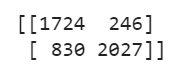

In [ ]:
plot.plot(model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
# plot.savefig('LossVal_loss')
plot.plot(model.history['accuracy'], label='training accuracy')
plot.plot(model.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()
# plot.savefig('AccVal_acc')

### **Phase 2:** `tuberculosis`, `pneumonia`, `mass`, `effusion`
Mục đích của việc phân loại `normal` và `positive`:


* Bài toán multi-classification







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os

from keras.layers import Dense, Flatten
from keras.models import Model
# from keras.applications.inception_v3 import InceptionV3
from keras.applications import MobileNetV3Large

from tensorflow.keras.optimizers import Adam

Read images using `ImageDataGenerator`

In [ ]:
# Defining the parameters
IMG_CHANEL = 3
COLOR_MODE = 'rgb'
CLASS_NAME = ['TUBERCULOSIS', 'PNEUMONIA', 'MASS', 'EFFUSION']
IMAGESHAPE = [224, 224, 3]

In [ ]:
# Function to feed data set into the model
from keras.preprocessing.image import ImageDataGenerator

## For training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:
# Setting folder path
train_data = 'data_positive/train_positive/'
val_data = 'data_positive/val_positive/'
test_data = 'data_positive/test_positive/'

In [ ]:
train_set = train_datagen.flow_from_directory(train_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 17369 images belonging to 2 classes.


In [ ]:
val_set = testing_datagen.flow_from_directory(val_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 1931 images belonging to 2 classes.


Build model

In [ ]:
mobilenet_v3_large_model = MobileNetV3Large(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
for each_layer in mobilenet_v3_large_model.layers:
		each_layer.trainable = False

In [ ]:
# Flatten output
flatten_layer = Flatten()(mobilenet_v3_large_model.output)
prediction = Dense(len(CLASS_NAME), activation='softmax')(flatten_layer)

In [ ]:
final_model = Model(inputs=mobilenet_v3_large_model.input, outputs=prediction)
final_model.summary()

In [ ]:
# Compile model
final_model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
)

In [ ]:
# Train model
fitted_model = final_model.fit_generator(generator = train_set,
                                         validation_data = val_set,
                                         epochs=10,
                                         steps_per_epoch=len(train_set),
                                         validation_steps=len(val_set)
                                        )

In [ ]:
# Save model
final_model.save('saved_model/mobilenet_v3_large_multi_classes_size224.h5')

#### Load saved model and predict on test set

In [ ]:
test_data = 'data/test/'

from keras.preprocessing.image import ImageDataGenerator
## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:
test_set = testing_datagen.flow_from_directory(test_data,
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               shuffle = False,
                                               color_mode = "rgb",
                                               class_mode = 'categorical')

Found 4827 images belonging to 2 classes.


In [ ]:
from keras.models import load_model
# Load model
model=load_model('/content/drive/MyDrive/Paper Xu ly anh y khoa/saved_model/mobilenet_v3_large_multi_classes_size224.h5')
prediction=model.predict(test_set)

76/76 [==============================] - 841s 11s/step


In [ ]:
# Convert y_pred to binary
y_pred = []
for i in range(0,len(prediction)):
    if prediction[i][0]>prediction[i][1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
print(y_pred)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Convert y_true to list
y_true = test_set.classes.tolist()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
report = classification_report(y_true, y_pred, digits=4, output_dict=True)
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8861    0.1421    0.2450      1970
           1     0.6254    0.9874    0.7657      2857

    accuracy                         0.6424      4827
   macro avg     0.7557    0.5648    0.5054      4827
weighted avg     0.7318    0.6424    0.5532      4827



In [ ]:
# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Save the DataFrame to a CSV file
df.to_csv('report_mobilenet_multi_classes_size224.csv', index=True)

In [ ]:
print(confusion_matrix(y_true, y_pred))

[[ 280 1690]
 [  36 2821]]


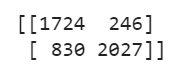

In [ ]:
plot.plot(model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
# plot.savefig('LossVal_loss')
plot.plot(model.history['accuracy'], label='training accuracy')
plot.plot(model.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()
# plot.savefig('AccVal_acc')